In [4]:
#!/usr/bin/env python

import sys
import os
absFilePath = os.path.abspath('attractor_switching.py')
fileDir = os.path.dirname(absFilePath)
parentDir = os.path.dirname(fileDir)

# change working directory to the project file of codes, use parentDir else
sys.path.append(parentDir+'/src')

import numpy as np
import matplotlib
import pickle
import matplotlib.pyplot as plt
from pylab import figure, cm

In [5]:
filename=fileDir+'/data/data_figure_9_13'
with open(filename, 'rb') as pickle_file:
    data = pickle.load(pickle_file)
eta_ar=data['eta_ar']
bifurcation_ar=data['bifurcation_ar']
mean_energy=data['mean_energy']
std_energy=data['std_energy']
degree=data['degree']
average_c=data['average_controllability']
modal_c=data['modal_controllability']
figures=['9a','9b','13a','13b','13c','13d']

In [6]:
def create_plot(x,y,yerror,eta_ar,xname):
    fs=30

    cols=['black','lightgreen','red']
    labels=['$\eta=0.0$','$\eta=0.012$','$\eta=0.024$']

    kwargs = dict(ecolor='k', color='k', capsize=2,
                  elinewidth=1.1, linewidth=0.6, ms=11)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

    for e,eta in enumerate(eta_ar):
        ax.errorbar(x,y[b,e] ,yerr=yerror[b,e], fmt='o', mfc=cols[e],label=labels[e], **kwargs)
    ax.set_xlabel(xname,size=fs)
    ax.set_ylabel('control signal energy',size=fs)
    ax.tick_params(labelsize=fs)
    ax.grid(True)
    ax.set_ylim(0,np.max(y[b])+np.max(yerror[b]))
    ax.legend(loc='lower right', frameon=True,fontsize=fs)
    ax.legend(loc='upper right', ncol=1, frameon=True,fontsize=fs-9)
    #ax.set_title(bifurcation+' bifurcation',size=fs, pad=20,color='r')


Figure 9a


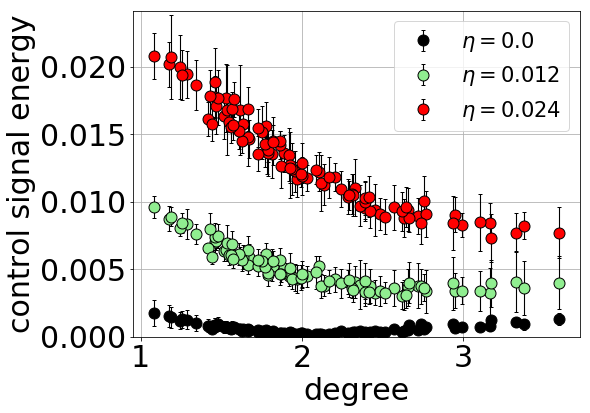

Figure 9b


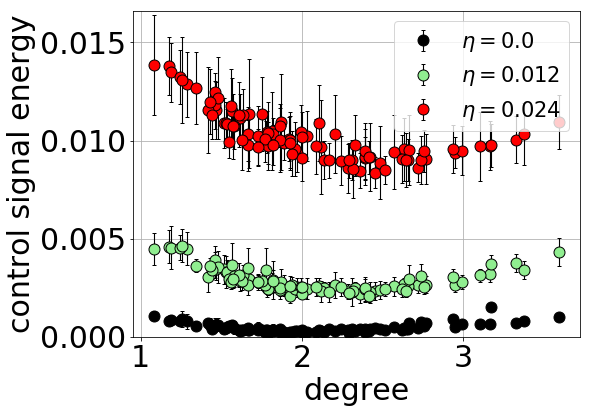

Figure 13a


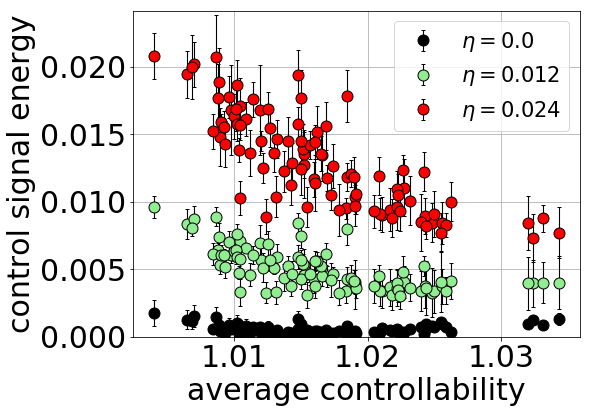

Figure 13b


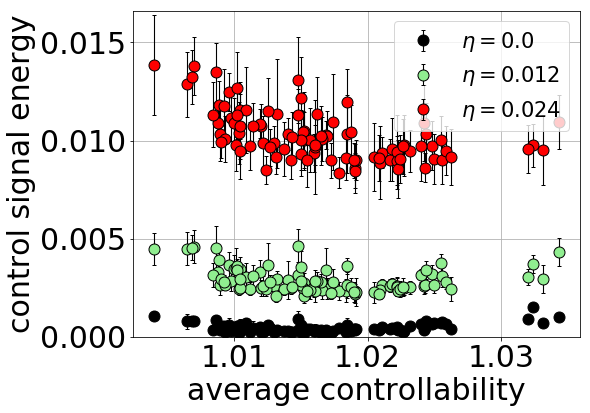

Figure 13c


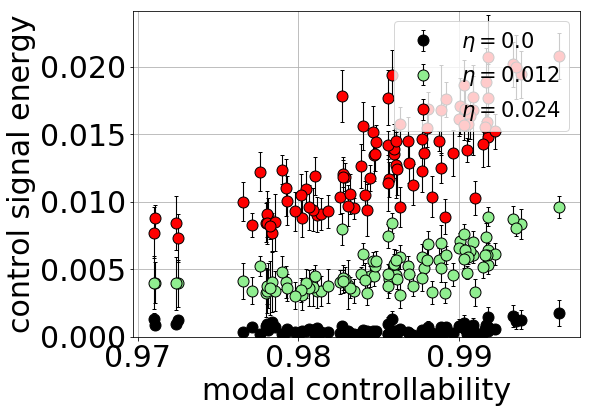

Figure 13d


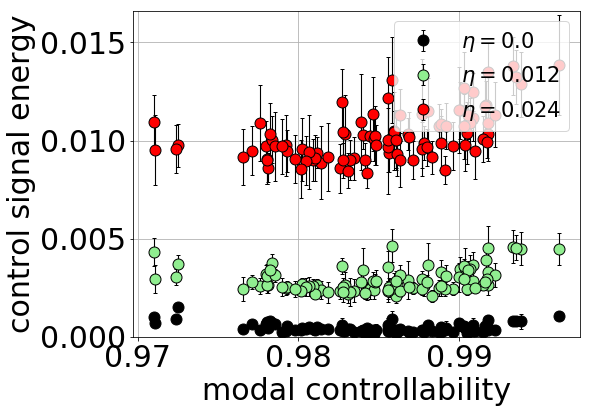

In [7]:
xnames=['degree','average controllability','modal controllability']
x_ar=([degree,average_c,modal_c])
i=0
for x_idx,x in enumerate(x_ar):
    for b,bifurcation in enumerate(bifurcation_ar):
        print('Figure',figures[i])
        create_plot(x,mean_energy,std_energy,eta_ar,xnames[x_idx])
        plt.savefig(fileDir+'/figures/figure_'+figures[i]+'.png', bbox_inches='tight') 
        plt.show()
        i+=1